In [55]:
#Goal lets look at QB data from the NFL 2021-2022 season

# Import scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup
# Import pandas and Numpy
import pandas as pd
import numpy as np
# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

In [80]:
# URL
url = 'https://www.pro-football-reference.com/years/2021/passing.htm'
# Open URL
html = urlopen(url)
stats_page = BeautifulSoup(html)

In [81]:
# headers
column_headers = stats_page.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [82]:
print(column_headers)

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD']


In [83]:
# Collect table rows
rows = stats_page.findAll('tr')[1:]
# Get stats from each row
qb_stats = []
for i in range(len(rows)):
  qb_stats.append([col.getText() for col in rows[i].findAll('td')])

In [84]:
#Print TB12
print(qb_stats[0])

#Print Mac Jones stats
print(qb_stats[12])

['Tom Brady*', 'TAM', '44', 'QB', '17', '17', '13-4-0', '485', '719', '67.5', '5316', '43', '6', '12', '1.7', '269', '62', '7.4', '7.8', '11.0', '312.7', '102.1', '68.1', '22', '144', '3', '6.98', '7.41', '3', '5']
['Mac Jones*', 'NWE', '23', 'QB', '17', '17', '10-7-0', '352', '521', '67.6', '3801', '22', '4.2', '13', '2.5', '177', '75', '7.3', '7.0', '10.8', '223.6', '92.5', '50.9', '28', '241', '5.1', '6.48', '6.22', '1', '1']


In [85]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qb_stats, columns=column_headers[1:])

In [86]:
#Check out the head of our data
data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD
0,Tom Brady*,TAM,44,QB,17,17,13-4-0,485,719,67.5,...,312.7,102.1,68.1,22,144,3,6.98,7.41,3,5
1,Justin Herbert*,LAC,23,QB,17,17,9-8-0,443,672,65.9,...,294.9,97.7,65.6,31,214,4.4,6.83,6.95,5,5
2,Matthew Stafford,LAR,33,QB,17,17,12-5-0,404,601,67.2,...,287.4,102.9,63.8,30,243,4.8,7.36,7.45,3,4
3,Patrick Mahomes*,KAN,26,QB,17,17,12-5-0,436,658,66.3,...,284.6,98.5,62.2,28,146,4.1,6.84,7.07,3,3
4,Derek Carr,LVR,30,QB,17,17,10-7-0,428,626,68.4,...,282.6,94.0,52.4,40,241,6,6.85,6.60,3,6


In [87]:
#Check out tail (Want to see non QBs who threw passes)
data.tail()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD
113,Cordarrelle Patterson,ATL,30,RB,16,13,,0,1,0,...,0.0,39.6,2.9,0,0,0,0.00,0.00,,
114,Brett Rypien,DEN,25,,1,0,,0,2,0,...,0.0,39.6,1.1,0,0,0,0.00,0.00,,
115,D'Andre Swift,DET,22,rb,13,4,,0,1,0,...,0.0,39.6,0.5,0,0,0,0.00,0.00,,
116,Albert Wilson,MIA,29,wr,14,5,,0,1,0,...,0.0,39.6,0.0,1,1,50,-0.50,-0.50,,
117,Brandon Zylstra,CAR,28,wr,13,3,,0,1,0,...,0.0,39.6,0.4,0,0,0,0.00,0.00,,


In [90]:
# Clean other columns up by creating dictionary
# first value = old name
# second value = new name

dict = {'Tm': 'Team',
        'Sk': 'Sacked',
        '4QC': 'Comebacks'}

# call rename () method
data.rename(columns=dict,
          inplace=True) 

# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [91]:
data.columns

Index(['Player', 'Team', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A',
       'Y/C', 'Y/G', 'Rate', 'QBR', 'Sacked', 'Yds_Sack', 'Sk%', 'NY/A',
       'ANY/A', 'Comebacks', 'GWD'],
      dtype='object')

In [127]:
#Lets get columns we want
stats = ['Age', 'Cmp%', 'Yds', 'TD',\
         'Int', 'Y/A', 'Lng','Y/G', 'Rate', 'QBR', 'Sacked','GWD']

In [128]:
data_stats = data[['Player', 'Team'] + stats]

In [129]:
data_stats["Team"].unique()

array(['TAM', 'LAC', 'LAR', 'KAN', 'LVR', 'CIN', 'DAL', 'BUF', 'MIN',
       'GNB', 'ATL', 'SFO', 'NWE', 'ARI', 'PIT', 'TEN', 'JAX', 'IND',
       'WAS', 'DET', 'PHI', 'SEA', 'DEN', 'CLE', 'BAL', 'HOU', 'MIA',
       'CAR', 'NYG', None, 'NYJ', 'CHI', 'NOR', '2TM'], dtype=object)

In [130]:
data_stats[data_stats["Team"] == 'NWE']

,Player,Team,Age,Cmp%,Yds,TD,Int,Y/A,Lng,Y/G,Rate,QBR,Sacked,GWD
12,Mac Jones*,NWE,23,67.6,3801,22,13,7.3,75,223.6,92.5,50.9,28,1
56,Brian Hoyer,NWE,36,81.8,227,1,0,20.6,48,45.4,149.1,97.4,0,
70,Jakobi Meyers,NWE,25,100,45,0,0,22.5,30,2.6,118.7,73.6,0,
77,Kendrick Bourne,NWE,26,100,25,1,0,25.0,25,1.5,158.3,100.0,0,


In [131]:
data_stats[data_stats["Team"] == '2TM']

,Player,Team,Age,Cmp%,Yds,TD,Int,Y/A,Lng,Y/G,Rate,QBR,Sacked,GWD
45,Josh Johnson,2TM,35,67.1,638,5,2,7.5,28,159.5,99.0,51.7,3,0


In [132]:
data_stats[data_stats["Team"] == 'None']

,Player,Team,Age,Cmp%,Yds,TD,Int,Y/A,Lng,Y/G,Rate,QBR,Sacked,GWD


In [133]:
data_stats.dtypes

Player    object
Team      object
Age       object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Lng       object
Y/G       object
Rate      object
QBR       object
Sacked    object
GWD       object
dtype: object

In [134]:
# Convert data to numerical values
for i in stats:
  data_stats[i] = pd.to_numeric(data[i])

/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
data_stats.dtypes

Player     object
Team       object
Age       float64
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Lng       float64
Y/G       float64
Rate      float64
QBR       float64
Sacked    float64
GWD       float64
dtype: object

In [136]:
data_stats['Player'] = data_stats['Player'].str.replace('*', '')
data_stats['Player'] = data_stats['Player'].str.replace('+', '')

/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
# Filter by Completions
data_stats_filter = data_stats[data_stats['Cmp'] >= 50]

KeyError: 'Cmp'

In [138]:
print(data_stats_filter.shape)
data_stats_filter

(46, 32)


,Player,Team,Age,G,Cmp,Cmp%,Yds,TD,Int,Y/A,...,TD_Rank,Int_Rank,Y/A_Rank,Lng_Rank,Y/G_Rank,Rate_Rank,QBR_Rank,Sacked_Rank,Comebacks_Rank,GWD_Rank
0,Tom Brady,TAM,44.0,17.0,485.0,67.5,5316.0,43.0,12.0,7.4,...,1.000000,0.304348,0.695652,0.456522,1.000000,0.826087,0.978261,0.358696,0.774194,0.919355
1,Justin Herbert,LAC,23.0,17.0,443.0,65.9,5014.0,38.0,15.0,7.5,...,0.956522,0.065217,0.793478,0.750000,0.978261,0.695652,0.956522,0.619565,0.967742,0.919355
2,Matthew Stafford,LAR,33.0,17.0,404.0,67.2,4886.0,41.0,17.0,8.1,...,0.978261,0.010870,0.956522,0.913043,0.934783,0.869565,0.913043,0.543478,0.774194,0.790323
3,Patrick Mahomes,KAN,26.0,17.0,436.0,66.3,4839.0,37.0,13.0,7.4,...,0.913043,0.217391,0.695652,0.826087,0.913043,0.717391,0.891304,0.456522,0.774194,0.645161
4,Derek Carr,LVR,30.0,17.0,428.0,68.4,4804.0,23.0,14.0,7.7,...,0.739130,0.130435,0.880435,0.423913,0.891304,0.630435,0.673913,0.880435,0.774194,0.967742
5,Joe Burrow,CIN,25.0,16.0,366.0,70.4,4611.0,34.0,14.0,8.9,...,0.847826,0.130435,1.000000,0.934783,0.956522,0.978261,0.717391,0.978261,0.580645,0.645161
6,Dak Prescott,DAL,28.0,16.0,410.0,68.8,4449.0,37.0,10.0,7.5,...,0.913043,0.434783,0.793478,0.195652,0.869565,0.956522,0.760870,0.543478,0.354839,0.500000
7,Josh Allen,BUF,25.0,17.0,409.0,63.3,4407.0,36.0,15.0,6.8,...,0.869565,0.065217,0.347826,0.423913,0.804348,0.586957,0.869565,0.402174,NaN,NaN
8,Kirk Cousins,MIN,33.0,16.0,372.0,66.3,4221.0,33.0,7.0,7.5,...,0.826087,0.641304,0.793478,0.565217,0.826087,0.923913,0.652174,0.456522,0.774194,0.790323
9,Aaron Rodgers,GNB,38.0,16.0,366.0,68.9,4115.0,37.0,4.0,7.7,...,0.913043,0.826087,0.880435,0.826087,0.782609,1.000000,1.000000,0.543478,0.354839,0.500000


In [139]:
#Remove NaN in whole datafram
data_stats_filter.fillna(0)

,Player,Team,Age,G,Cmp,Cmp%,Yds,TD,Int,Y/A,...,TD_Rank,Int_Rank,Y/A_Rank,Lng_Rank,Y/G_Rank,Rate_Rank,QBR_Rank,Sacked_Rank,Comebacks_Rank,GWD_Rank
0,Tom Brady,TAM,44.0,17.0,485.0,67.5,5316.0,43.0,12.0,7.4,...,1.000000,0.304348,0.695652,0.456522,1.000000,0.826087,0.978261,0.358696,0.774194,0.919355
1,Justin Herbert,LAC,23.0,17.0,443.0,65.9,5014.0,38.0,15.0,7.5,...,0.956522,0.065217,0.793478,0.750000,0.978261,0.695652,0.956522,0.619565,0.967742,0.919355
2,Matthew Stafford,LAR,33.0,17.0,404.0,67.2,4886.0,41.0,17.0,8.1,...,0.978261,0.010870,0.956522,0.913043,0.934783,0.869565,0.913043,0.543478,0.774194,0.790323
3,Patrick Mahomes,KAN,26.0,17.0,436.0,66.3,4839.0,37.0,13.0,7.4,...,0.913043,0.217391,0.695652,0.826087,0.913043,0.717391,0.891304,0.456522,0.774194,0.645161
4,Derek Carr,LVR,30.0,17.0,428.0,68.4,4804.0,23.0,14.0,7.7,...,0.739130,0.130435,0.880435,0.423913,0.891304,0.630435,0.673913,0.880435,0.774194,0.967742
5,Joe Burrow,CIN,25.0,16.0,366.0,70.4,4611.0,34.0,14.0,8.9,...,0.847826,0.130435,1.000000,0.934783,0.956522,0.978261,0.717391,0.978261,0.580645,0.645161
6,Dak Prescott,DAL,28.0,16.0,410.0,68.8,4449.0,37.0,10.0,7.5,...,0.913043,0.434783,0.793478,0.195652,0.869565,0.956522,0.760870,0.543478,0.354839,0.500000
7,Josh Allen,BUF,25.0,17.0,409.0,63.3,4407.0,36.0,15.0,6.8,...,0.869565,0.065217,0.347826,0.423913,0.804348,0.586957,0.869565,0.402174,0.000000,0.000000
8,Kirk Cousins,MIN,33.0,16.0,372.0,66.3,4221.0,33.0,7.0,7.5,...,0.826087,0.641304,0.793478,0.565217,0.826087,0.923913,0.652174,0.456522,0.774194,0.790323
9,Aaron Rodgers,GNB,38.0,16.0,366.0,68.9,4115.0,37.0,4.0,7.7,...,0.913043,0.826087,0.880435,0.826087,0.782609,1.000000,1.000000,0.543478,0.354839,0.500000


In [140]:
# Create columns with percentile rank
for i in stats:
  data_stats_filter[i + '_Rank'] = \
  data_stats_filter[i].rank(pct=True)
# We need to flip the rank for interceptions and Sacked
data_stats_filter['Int_Rank'] = \
1 - data_stats_filter['Int_Rank']

data_stats_filter['Sacked_Rank'] = \
1 - data_stats_filter['Sacked_Rank']


/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [141]:
data_stats_filter.head()

,Player,Team,Age,G,Cmp,Cmp%,Yds,TD,Int,Y/A,...,TD_Rank,Int_Rank,Y/A_Rank,Lng_Rank,Y/G_Rank,Rate_Rank,QBR_Rank,Sacked_Rank,Comebacks_Rank,GWD_Rank
0,Tom Brady,TAM,44.0,17.0,485.0,67.5,5316.0,43.0,12.0,7.4,...,1.000000,0.304348,0.695652,0.456522,1.000000,0.826087,0.978261,0.358696,0.774194,0.919355
1,Justin Herbert,LAC,23.0,17.0,443.0,65.9,5014.0,38.0,15.0,7.5,...,0.956522,0.065217,0.793478,0.750000,0.978261,0.695652,0.956522,0.619565,0.967742,0.919355
2,Matthew Stafford,LAR,33.0,17.0,404.0,67.2,4886.0,41.0,17.0,8.1,...,0.978261,0.010870,0.956522,0.913043,0.934783,0.869565,0.913043,0.543478,0.774194,0.790323
3,Patrick Mahomes,KAN,26.0,17.0,436.0,66.3,4839.0,37.0,13.0,7.4,...,0.913043,0.217391,0.695652,0.826087,0.913043,0.717391,0.891304,0.456522,0.774194,0.645161
4,Derek Carr,LVR,30.0,17.0,428.0,68.4,4804.0,23.0,14.0,7.7,...,0.739130,0.130435,0.880435,0.423913,0.891304,0.630435,0.673913,0.880435,0.774194,0.967742


In [142]:
# plot parameters for radar chart
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

In [143]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d', 'CAR':'#0085ca', \
               'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 'DEN':'#002244', \
               'DET':'#0076b6', 'GNB':'#203731', 'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', \
               'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683', \
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 'OAK':'#000000', \
               'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', \
               'TEN':'#0c2340', 'WAS':'#773141'}

In [148]:
# plot our points every 2π/15 radians (15 categories)
offset = np.pi/12
angles = np.linspace(0, 2*np.pi, len(stats) + 1) + offset

In [149]:
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], 
            player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], 
            player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', 
            size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [150]:
def get_qb_data(data, team):
  return np.asarray(data[data['Team'] == team])[0]

/Users/nickconsolini/opt/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


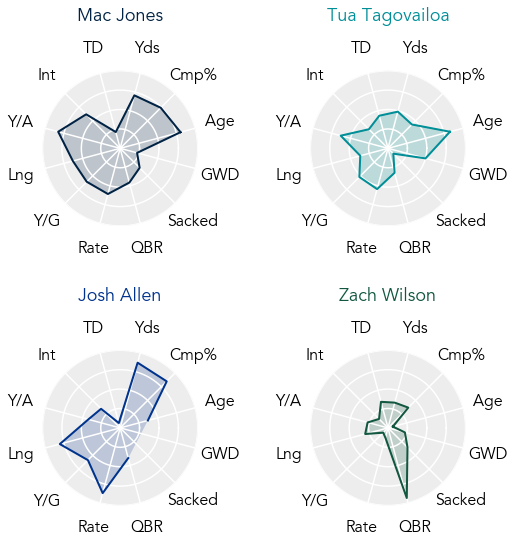

In [151]:
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')
# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')
# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)
# Get QB data
nwe_data = get_qb_data(data_stats_filter, 'NWE')
mia_data = get_qb_data(data_stats_filter, 'MIA')
buf_data = get_qb_data(data_stats_filter, 'BUF')
nyj_data = get_qb_data(data_stats_filter, 'NYJ')
# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, buf_data, team_colors['BUF'])
ax4 = create_radar_chart(ax4, angles, nyj_data, team_colors['NYJ'])
plt.show()


KeyError: 25

In [156]:
data_stats_filter.loc[30]

Player            Zach Wilson
Team                      NYJ
Age                        22
G                          13
Cmp                       213
Cmp%                     55.6
Yds                      2334
TD                          9
Int                        11
Y/A                       6.1
Lng                        54
Y/G                     179.5
Rate                     69.7
QBR                      28.2
Sacked                    -43
Comebacks                   1
GWD                         1
Age_Rank            0.0434783
G_Rank               0.456522
Cmp_Rank             0.369565
Cmp%_Rank           0.0652174
Yds_Rank             0.369565
TD_Rank              0.336957
Int_Rank             0.347826
Y/A_Rank             0.163043
Lng_Rank             0.271739
Y/G_Rank             0.304348
Rate_Rank           0.0869565
QBR_Rank             0.130435
Sacked_Rank          0.934783
Comebacks_Rank       0.354839
GWD_Rank             0.225806
Name: 30, dtype: object